# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Merge data from each month into one CSV

In [2]:
path_to_files = 'C:/Users/THE USER/Documents/github_project_datasets/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
file_names = os.listdir(path_to_files)
csv_files = [file_name for file_name in file_names if file_name.endswith('.csv')]

dataframes = []

for csv_file in csv_files:
    file_path = os.path.join(path_to_files, csv_file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

all_data = pd.concat(dataframes, ignore_index=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Drop rows of NAN

In [3]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [4]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [5]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column 

In [6]:
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [7]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [9]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


range(1, 13)


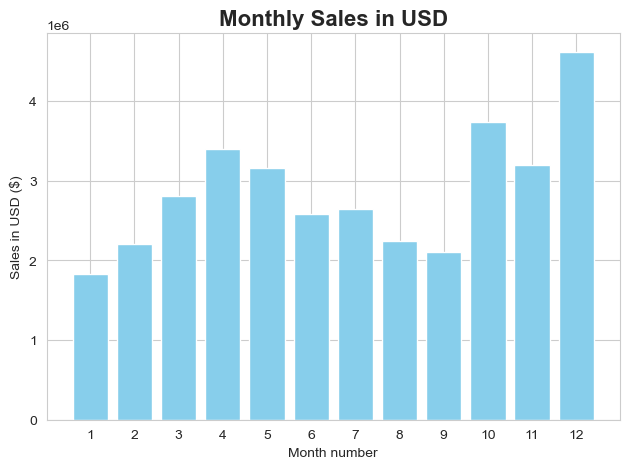

In [10]:
# Set a stylish color palette
sns.set_palette("pastel")
sns.set_style("whitegrid")

# Define your data
months = range(1, 13)  # Assuming you have data for all 12 months
print(months)

# Calculate the total sales per month
total_sales = all_data.groupby(['Month']).sum()['Sales']

# Create the bar chart with a pleasant color
  # Increase the figure size for better visibility
plt.bar(months, total_sales, color='skyblue')  # Changed color to 'skyblue'

# Customize x-axis labels, y-axis label, and title
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

# Add a title with better font size and weight
plt.title("Monthly Sales in USD", fontsize=16, fontweight='bold')

# Adjust the layout to prevent the title from getting clipped
plt.tight_layout()

plt.show()
# The Value on Y-Axis are in the mutiples of 1 Million 




#### Question 2: What city sold the most product?

In [11]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


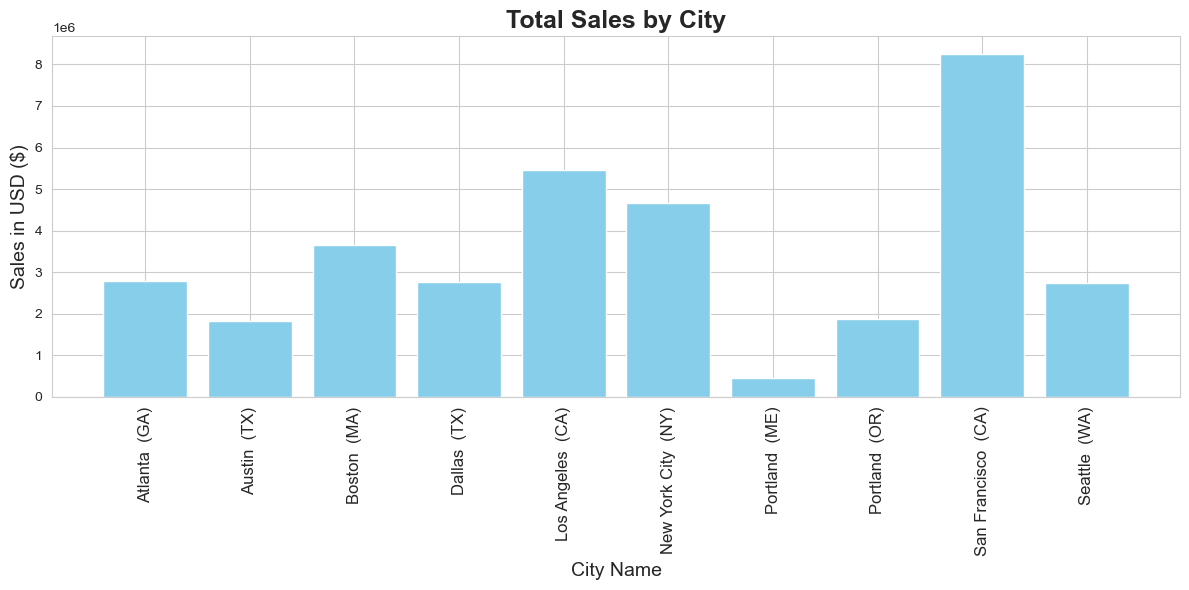

In [12]:
city_groups = all_data.groupby('City')
city_sales = city_groups['Sales'].sum()  # Assuming you want to sum up sales for each city


# Create the bar chart 
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility
plt.bar(city_sales.index, city_sales.values, color='skyblue')  # Changed color to 'skyblue'

# Customize x-axis labels, y-axis label, and title
plt.xticks(rotation='vertical', fontsize=12)  # Rotated labels vertically for better readability
plt.ylabel('Sales in USD ($)', fontsize=14)
plt.xlabel('City Name', fontsize=14)

# Add a title with better font size and weight
plt.title("Total Sales by City", fontsize=18, fontweight='bold')

# Adjust the layout to prevent the title from getting clipped
plt.tight_layout()

plt.show()



#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [13]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


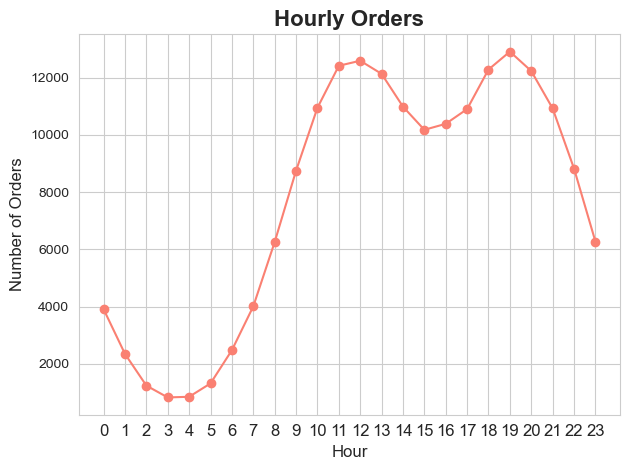

In [14]:
hourly_sales = all_data.groupby('Hour')['Sales'].count()


 # Increase the figure size for better visibility
plt.plot(hourly_sales.index, hourly_sales.values, color='salmon', marker='o')  # Adjusted color to 'salmon'

# Customize x-axis and y-axis labels
plt.xticks(hourly_sales.index, fontsize=12)  # Increased x-axis label font size
plt.xlabel('Hour', fontsize=12)  # Increased x-axis label font size
plt.ylabel('Number of Orders', fontsize=12)  # Increased y-axis label font size

# Add a grid for better readability
plt.grid()

# Add a title with better font size and weight
plt.title("Hourly Orders", fontsize=16, fontweight='bold')

# Adjust the layout to prevent the title from getting clipped
plt.tight_layout()
plt.grid()
plt.show()
# My recommendation is slightly before 7pm  or between 11am - 12 noon 

#### Question 4 : What product sold the most? Why do you think it sold the most?

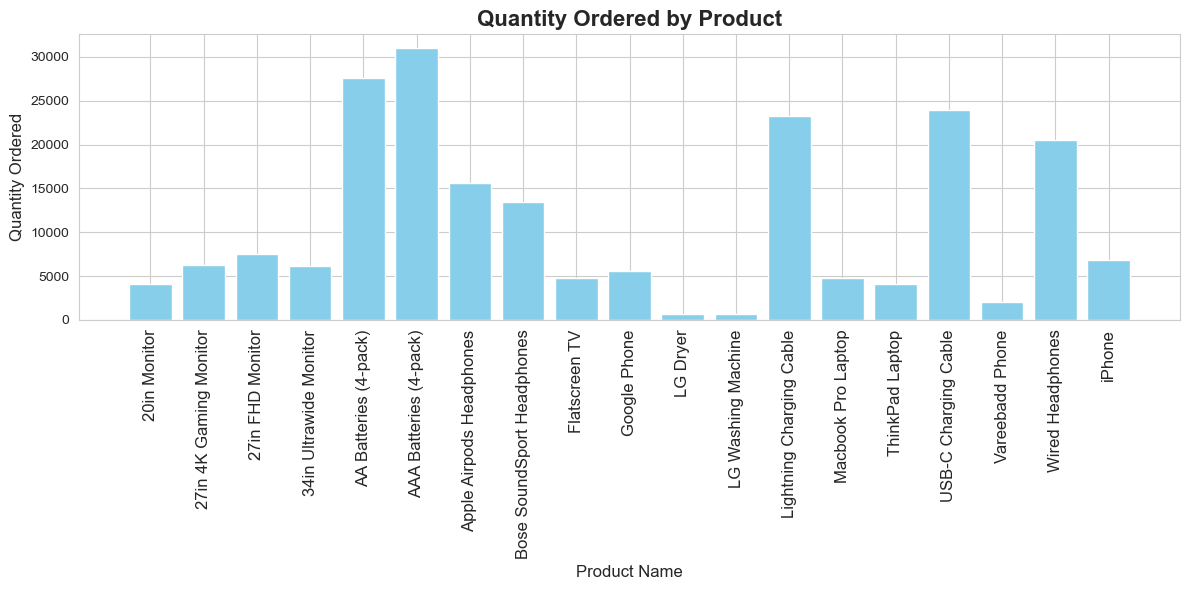

In [15]:
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']
#quantity_ordered = product_group.sum()['Quantity Ordered']

# Create the bar chart with a pleasant color
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility
plt.bar(quantity_ordered.index, quantity_ordered.values, color='skyblue')  # Changed color to 'skyblue'

# Customize x-axis labels
plt.xticks(rotation='vertical', fontsize=12)  # Increased x-axis label font size

# Add labels and a title
plt.xlabel('Product Name', fontsize=12)  # Increased x-axis label font size
plt.ylabel('Quantity Ordered', fontsize=12)  # Increased y-axis label font size
plt.title("Quantity Ordered by Product", fontsize=16, fontweight='bold')

# Adjust the layout to prevent the title from getting clipped
plt.tight_layout()

plt.show()


C:\Users\THE USER\AppData\Local\Temp\ipykernel_7092\1133632313.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity_ordered.index, rotation=90)


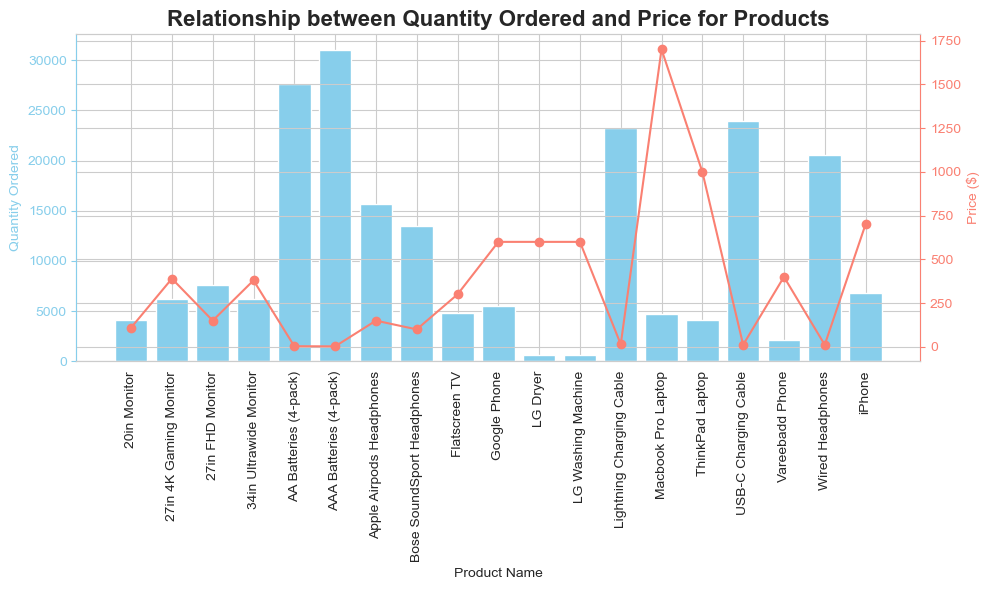

In [16]:
# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))  # Increase the figure size for better visibility

# Group the data
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']
prices = all_data.groupby('Product').mean()['Price Each']

# Plot the bar chart 
ax1.bar(quantity_ordered.index, quantity_ordered.values, color='skyblue')  # Changed color to 'skyblue'

# Create a twin axis for the line chart
ax2 = ax1.twinx()
ax2.plot(prices.index, prices.values, color="salmon", marker='o')  # Changed color to 'salmon' for a contrasting effect

# Set axis labels and title
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='skyblue')  # Match the color to the bar chart
ax2.set_ylabel('Price ($)', color='salmon')  # Match the color to the line chart
ax1.set_xticklabels(quantity_ordered.index, rotation=90)

# Customize ticks and spines
ax1.tick_params(axis='y', colors='skyblue')
ax2.tick_params(axis='y', colors='salmon')
ax2.spines['right'].set_color('salmon')
ax2.spines['left'].set_color('skyblue')

# Add a title 
plt.title("Relationship between Quantity Ordered and Price for Products", fontsize=16, fontweight='bold')

# Adjust the layout to prevent the title from getting clipped
plt.tight_layout()

plt.show()

fig.savefig('Relationship between Quantity Ordered and Price for Products-V3.png', bbox_inches = 'tight')